**Data I will be working with covers over 100k medical appointments in Brazil with 15 variables. Variables are as follows:**

*PatientId* - Identification of a patient

*AppointmentID* - Identification of each appointment 

*Gender* = Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man

*ScheduledDay* = The day of the actuall appointment, when they have to visit the doctor 

*AppointmentDay* = The day someone called or registered the appointment

*Age* = How old is the patient

*Neighbourhood* = Where the appointment takes place 

*Scholarship* = Ture of False . 'Bolsa Familia' - provides financial aid to poor Brazilian families

*Hipertension* = True or False 

*Diabetes* = True or False 

*Alcoholism* = True or False 

*Handcap* = True or False 

*SMS_received* = 1 if the text message(s) was sent, 0 if no text was sent

*No-show* = True or False

In [67]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline


df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [68]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As **PatientId** is formated as a float and uses e-notation making the data harder to read it will be removed. It doesn't provide much information and PatientId isn't useful in answering the main question: **'What are the reasons behind medical no-shows?'**

In [70]:
df.drop(['PatientId'],axis=1, inplace=True)

In [71]:
df.head(1)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Another 2 columns that should be modified are AppointmentDay and ScheduledDay - they both present date but are represented by strings. They should be changed to datetime format. The AppointmentDay provides date whereas ScheduledDay provides date and time. As we're unable to add time to AppointmentDay, let's get rid of time on ScheduledDay so they're formated the same way.

In [72]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date

**'No-show' column was worth changing to a 0-1 values, rather than using No-Yes. It will help with future analysis.**

In [73]:
df['No-show']=df['No-show'].replace({'No':0,'Yes':1})

**It's worth checking if any values are duplicated:**

In [74]:
sum(df.duplicated())

0

**Check if any values are nulls**

In [123]:
df.isnull().values.any()

False

**As montioned in the introduction, there's more women in the dataset than men. It's worth checking how big is the difference**

In [76]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

**There's almost twice the entries for women than for men!**

**It would be worth exploring how the no-shows looks across the gender**

In [122]:
gender_noshows = df.groupby(['Gender', 'No-show']).size().to_dict() 
#Creating dict with number of no-shows and shows for both genders

In [78]:
gender_noshows

{('F', 0): 57246, ('F', 1): 14594, ('M', 0): 30962, ('M', 1): 7725}

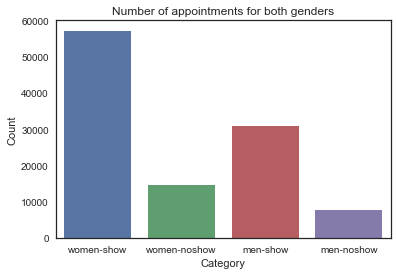

In [124]:
sns.set(style="white")
labels = ['women-show','women-noshow','men-show','men-noshow']
values = [57246, 14594, 30962, 7725]
ax = sns.barplot(x=labels, y=values)
ax.set(xlabel='Category', ylabel='Count', title='Number of appointments for both genders');

**After looking at the bar chart and simple division it turns out the percentage of no-shows for both genders is 20%.**

**Correlation used below shows that there aren't any strong correlations between No-show and any other value. The strongest relatioship seems to be between No-show and SMS_received meaning that sending a text message to the patient might influence whether they will show up to the appointment.**

**It also shows that there's a strong correlation between age and hipertension and diabetes.**

In [80]:
df.corr()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.162602
Age,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
Scholarship,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hipertension,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
No-show,-0.162602,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


## Question:Is there a correlation between number of no-shows and the time that separates date of booking the appointment and the appointment?

In [81]:
df['time_difference']=(df['AppointmentDay'] - df['ScheduledDay'])/pd.Timedelta(1, unit='d') #transform into numeric value

In [82]:
df['time_difference'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: time_difference, dtype: float64

**As the 3rd quartile equals 15, with the minimum value of -6. The appointment couldn't be made after the appointment date so anything below 0 should also be removed.**

In [83]:
df = df.loc[df['time_difference'] >=0] #Removing any values of time_difference below 0

In [84]:
ns_timediff=df[df['No-show']==1] #Saving all the no-shows 

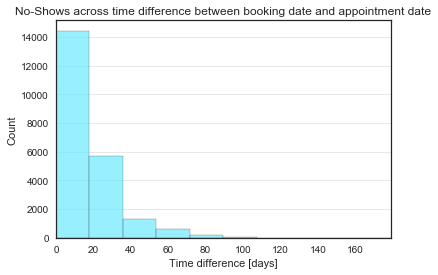

In [85]:
plt.pyplot.hist(ns_timediff['time_difference'], alpha=0.65, ec='black', color='#61E8FF')
plt.pyplot.xlabel('Time difference [days]')
plt.pyplot.xlim(0,179)
plt.pyplot.ylabel('Count')
plt.pyplot.title('No-Shows across time difference between booking date and appointment date')
plt.pyplot.grid(axis='y', alpha=0.45)

In [86]:
ns_timediff.groupby('time_difference')['AppointmentID'].nunique().head() #Examining number of no-shows for different time_difference

time_difference
0.0    1792
1.0    1113
2.0    1602
3.0     644
4.0    1231
Name: AppointmentID, dtype: int64

**The histogram shows that most of the no-shows happens on appointments booked on the day or up to 10 days before. With time the number of no-shows lowers but so does the number of bookings. It would be best to check the proportion of no-shows over time.**

In [87]:
time_proportion = ns_timediff.groupby('time_difference')['AppointmentID'].nunique() / df.groupby('time_difference')['AppointmentID'].nunique()
#Calculating the proportion of no-shows to all appointments.

In [88]:
time_proportion.dropna(inplace=True) #Removing NaN values

In [89]:
time_proportion.describe()

count    111.000000
mean       0.347228
std        0.168700
min        0.046469
25%        0.266457
50%        0.316592
75%        0.364300
max        1.000000
Name: AppointmentID, dtype: float64

Some of the values (nulls) had to removed - if the time_difference data had only few appointments for given value and all of these appointments took place, there were no no-shows, meaning the ns_timediff data didn't have that value which, after division gave a null. 
The average proportion of no-shows is around 0.35 which means about 35% of appointments made did not happen. Maximum value of 1 is a case of only 1 appontment made with a specific time difference that ended up being a no-show. 

**Age**

Age column needed to be filtered as the minimum value was equal to -1 which is impossible. The maximum value is 115 and with todays medicine it seems like a possible age.

In [90]:
df=df[df['Age']>=0] 

In [91]:
age_noshow=df.loc[df['No-show']==1, ['Age','No-show']]   #Saving no-shows for different age groups

Text(0.5,1,'Number of no-shows for different ages')

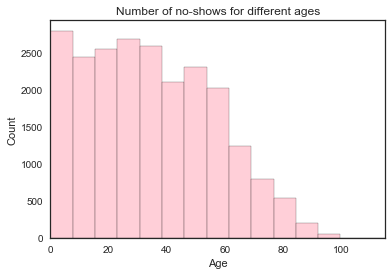

In [92]:
plt.pyplot.hist(age_noshow['Age'], color='pink', ec='black', bins=15, alpha=0.75)
plt.pyplot.xlim(0,115);
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Number of no-shows for different ages')

The graph shows that surprisingly high number of children under 5 don't show to their appointments. This may be due to a fact that parents book it for their children and then they get better/no longer need the doctor. Once the graph reaches 60 the number of no-shows falls which might suggest patients need the appointments more or the fact that number of patients above 60 is lower and their number of no-shows is therefore lower.

**Let's now investigate what neighbourhoods have the highest proportion of no-shows and see if there are any that stand out**

In [93]:
noshow_neighbourhood = df.groupby(['Neighbourhood'])['No-show'].sum() #Sum of noshows per neighbourhood

In [94]:
total_neighbourhood = df.groupby(['Neighbourhood'])['No-show'].count() #Sum of all appointments made in that neighbourhood

In [95]:
proportion_neighbourhood = noshow_neighbourhood/total_neighbourhood #Proportion of noshows to total number of appointments

In [96]:
proportion_neighbourhood.sort_values(inplace=True, ascending=False)

In [97]:
proportion_neighbourhood.head()

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
Name: No-show, dtype: float64

On the first place is a neighbourhood that has 100% of their bookings cancelled. Let's now check if there's no errors in the data.

In [98]:
df[df['Neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE']

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_difference
48754,5583947,F,2016-04-14,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,29.0
48765,5583948,F,2016-04-14,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,29.0


There were only 2 appointments made for this place and both of them got cancelled. The previous calculations should be then corrected - it would be good to only view places that had at least 100 bookings made.

In [99]:
proportion_neighbourhood = (noshow_neighbourhood)/(total_neighbourhood[total_neighbourhood>100])

This will most probably return null values so it's best to check if there are any present:

In [100]:
proportion_neighbourhood.isna().sum() #checking if there are any NaN values

7

In [120]:
proportion_neighbourhood.dropna(inplace=True) #Dropping NaN values

In [121]:
proportion_neighbourhood.sort_values(inplace=True, ascending=False) #Sorting the values (descending)

In [103]:
proportion_neighbourhood.describe()

count    74.000000
mean      0.201172
std       0.028228
min       0.145553
25%       0.182808
50%       0.198027
75%       0.218220
max       0.289185
Name: No-show, dtype: float64

This data shows that about 20% of bookings made end up being no-shows which mean 1 in 5 booking slots aren't used. Let's now see if this score improves with bookings that receive a text message reminder.

In [104]:
noshow_sms_neighbourhood = df.groupby(['Neighbourhood'])['No-show','SMS_received'].agg(({'SMS_received': ['sum'], 'No-show':['sum', 'count']}))

And again, it's better to work with places that had at least 100 appointments made.

In [105]:
nsn=noshow_sms_neighbourhood[noshow_sms_neighbourhood['No-show']['count']>100]  #Count representing the total number of appointments, not just noshows

In [106]:
nsn.sort_values(by=[('No-show','sum')], ascending=False, inplace=True)

C:\Users\User\Conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
nsn.head()

SMS_received No-show      
                        sum     sum count
Neighbourhood                            
JARDIM CAMBURI         2575    1465  7717
MARIA ORTIZ            2101    1219  5805
ITARARÉ                1151     923  3514
RESISTÊNCIA            1503     905  4430
CENTRO                 1080     703  3334

In [108]:
nsn_proportion=(nsn[('SMS_received','sum')])/(nsn[('No-show','sum')])
nsn_proportion.head() #the proportion of sent text messages to number of no-shows

Neighbourhood
JARDIM CAMBURI    1.757679
MARIA ORTIZ       1.723544
ITARARÉ           1.247021
RESISTÊNCIA       1.660773
CENTRO            1.536273
dtype: float64

Above data presents the proportion of text messages sent to the number of no-shows. 

Let's now investigate if the number of noshows lowers amonst patients who received a text reminding them of the appoinment.

In [109]:
noshow_sms=df[(df['SMS_received']==1)&(df['No-show']==1)] #Receiving number of patients who got the text and still didn't show up

In [110]:
noshow_sms=noshow_sms.groupby(['Neighbourhood'])['No-show'].count()

In [111]:
noshow_total=df.groupby(['Neighbourhood'])['No-show'].sum() #Number of noshows in total

In [112]:
noshow_total=noshow_total.to_frame('Noshow_total')

In [113]:
sms_total=pd.concat([noshow_sms, noshow_total], axis=1).dropna(); #Joining 2 series together and dropping nulls

In [114]:
sms_total.rename(index=str, columns={"No-show": "No_show_sms", "Noshow_total": "No_show_total"}, inplace=True);

In [115]:
sms_total['Proportion']=sms_total['No_show_sms']/sms_total['No_show_total'] 
#Calculating the proportion of noshows who got SMS to noshows in total

C:\Users\User\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


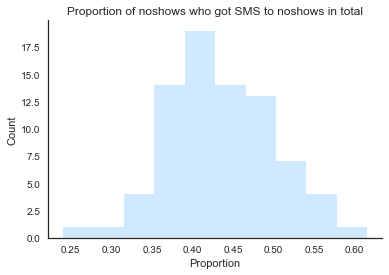

In [127]:
ax=sns.distplot(sms_total['Proportion'], kde=False, color='#8EC9FF', bins=10)
sns.despine(top=True, right=True)
ax.set(xlabel='Proportion', ylabel='Count', title='Proportion of noshows who got SMS to noshows in total');

In [117]:
sms_total['Proportion'].describe()

count    78.000000
mean      0.434889
std       0.066174
min       0.240271
25%       0.390199
50%       0.427052
75%       0.485606
max       0.615385
Name: Proportion, dtype: float64

Both the histogram and statistics show that on average 43% of noshows were patients that received the text message. It means that text messages helped about 57% of the patients. However there's no information if the text message was the only factor that contributed to patient showing up.

### This result should be checked - in the future analysis it would be good to check how many of the no-shows received the text message and if people who came to the appointment showed up because of the message they received - unfortunatelly for the time beeing we do not have appropriate data.

## Calculations and observations presented above show that there are a lot of factors that might influence whether the patient does or doesn't show up to their appointment. The location of the clinic, the age of the patient or something as simple as text message with a reminder can affect the proportion of no-shows to complete number of appointments made. 

## It seems that appointments made on the day or few days before have the highest number of no-shows so it might be worth looking into ways of requiring that patients who book appointment for the same day to confirm they will be able to make it. 

## Text message reminders might be a good idea but the data lacks information if patient who showed up actually needed the reminder - if they would not show up without it. Some of the older patients might not use it as not all of the patients have mobile phones.